In [1]:
!export CUDA_LAUNCH_BLOCKING=1
!export TORCH_USE_CUDA_DSA=1


In [2]:
!nvidia-smi

Sat Jul  5 20:22:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.163.01             Driver Version: 550.163.01     CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H100 80GB HBM3          Off |   00000000:5D:00.0 Off |                    0 |
| N/A   26C    P0             81W /  700W |       1MiB /  81559MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
# import torch
# torch.cuda.empty_cache()

In [4]:
%pip install unsloth
%pip install huggingface_hub datasets accelerate

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of xformers to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 83.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 128.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 126.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 117.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 148.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
%%bash
export PATH="$HOME/.local/bin:$PATH"

In [ ]:
%pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install --upgrade jupyter ipywidgets

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 2/5 [ipywidgets]  WARNING: The script jupyter-console is installed in '/home/ubuntu/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [jupyter]
Note: you may need to restart the kernel to use updated packages.


In [8]:
from unsloth import FastLanguageModel
import os

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/DeepSeek-R1-Distill-Qwen-7B",
    load_in_4bit=False,
    dtype="bfloat16",
    max_seq_length=2048,  
    token=os.getenv("HF_TOKEN"),
)

model.gradient_checkpointing_disable()

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.6.12: Fast Qwen2 patching. Transformers: 4.53.1.
   \\   /|    NVIDIA H100 80GB HBM3. Num GPUs = 1. Max memory: 79.096 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 9.0. CUDA Toolkit: 12.6. Triton: 3.3.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.88G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.33G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

In [9]:
from datasets import load_dataset
from unsloth.chat_templates import get_chat_template, standardize_data_formats

tokenizer = get_chat_template(
    tokenizer,
    chat_template = "qwen2.5",
)

dataset = load_dataset("open-r1/OpenR1-Math-220k", split="train")

dataset = standardize_data_formats(dataset)



README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

data/train-00000-of-00010.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

data/train-00001-of-00010.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

data/train-00002-of-00010.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

data/train-00003-of-00010.parquet:   0%|          | 0.00/217M [00:00<?, ?B/s]

data/train-00004-of-00010.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

data/train-00005-of-00010.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

data/train-00006-of-00010.parquet:   0%|          | 0.00/216M [00:00<?, ?B/s]

data/train-00007-of-00010.parquet:   0%|          | 0.00/216M [00:00<?, ?B/s]

data/train-00008-of-00010.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

data/train-00009-of-00010.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/93733 [00:00<?, ? examples/s]

In [10]:
print(dataset[999])

{'problem': 'Find all positive integers $k$ for which number $3^k+5^k$ is a power of some integer with exponent greater than $1$.', 'solution': '1. **Claim**: \\( k \\) must be odd.\n   - **Proof**: Assume \\( k \\) is even. Then \\( 3^k \\equiv 1 \\pmod{4} \\) and \\( 5^k \\equiv 1 \\pmod{4} \\) because any even power of an odd number is congruent to 1 modulo 4. Therefore, \\( 3^k + 5^k \\equiv 1 + 1 \\equiv 2 \\pmod{4} \\). However, 2 modulo 4 cannot be a power of an integer with an exponent greater than 1, as it would either have too many or too few factors of 2. Thus, \\( k \\) must be odd.\n\n2. **Consider \\( k \\) modulo 16**:\n   - Since \\( k \\) is odd, we need to check \\( 3^k + 5^k \\pmod{16} \\). For odd \\( k \\), \\( 3^k \\equiv 3 \\pmod{16} \\) and \\( 5^k \\equiv 5 \\pmod{16} \\). Therefore, \\( 3^k + 5^k \\equiv 3 + 5 \\equiv 8 \\pmod{16} \\). This implies that \\( 3^k + 5^k \\) must be a power of 2, specifically \\( 2^3 = 8 \\). Hence, the exponent must be 3.\n\n3. *

In [11]:
def formatting_prompts_func(examples):
    problems  = examples["problem"]
    solutions = examples["solution"]
    texts = [
        f"### Question:\n{prob}\n### Answer: {sol}"
        for prob, sol in zip(problems, solutions)
    ]
    return {"text": texts}

# Now just map it:
dataset = dataset.map(formatting_prompts_func, batched=True)

Map:   0%|          | 0/93733 [00:00<?, ? examples/s]

In [12]:

from trl import SFTConfig, SFTTrainer

sft_config = SFTConfig(
    dataset_text_field="text",
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    num_train_epochs=3,
    learning_rate=2e-5,
    optim="adamw_8bit",
    bf16=True,
    eval_strategy="steps",
    eval_steps=50,
)

In [13]:
# e.g. 90/10 split
split = dataset.train_test_split(test_size=0.1)
train_ds, val_ds = split["train"], split["test"]


In [14]:
train_ds[100]

{'problem': '8 For the real-coefficient quadratic equation $x^{2}+(a+1) x+a+b+1=0$ with two real roots $x_{1} 、 x_{2}$. If $0<x_{1}<1$ and $x_{2}>1$, then the range of $\\frac{b}{a}$ is ( ).\n(A) $\\left(-2,-\\frac{1}{2}\\right)$\n(B) $\\left(-2, \\frac{1}{2}\\right)$\n(C) $\\left(-1,-\\frac{1}{2}\\right)$\n(D) $\\left(-1, \\frac{1}{2}\\right)$',
 'solution': '8 Let $f(x)=x^{2}+(a+1) x+a+b+1$, then\n$$\n\\left\\{\\begin{array} { l } \n{ 0  1 }\n\\end{array} \\Leftrightarrow \\left\\{\\begin{array} { l } \n{ f ( 0 ) > 0 , } \\\\\n{ f ( 1 ) 0, \\\\\n2 a+b+3<0 .\n\\end{array}\\right.\\right.\\right.\n$$\n\nDraw the feasible region, the line $a+b+1=0$ and $2 a+b+$ $3=0$ intersect at point $A(-2,1)$. As shown in the figure, the feasible region for $(a, b)$ is the shaded area in the figure (excluding the boundary). $\\frac{b}{a}$ is the slope of the line connecting the point $(a, b)$ in the feasible region to the origin, clearly it is less than the slope of line $O A$, which is $-\\frac{1}{2

In [15]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 8,           # Larger = higher accuracy, but might overfit
    lora_alpha = 8,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
)

Unsloth 2025.6.12 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


In [16]:
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    args=sft_config,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    formatting_func=formatting_prompts_func,
)

Unsloth: Tokenizing ["text"] (num_proc=224):   0%|          | 0/84359 [00:00<?, ? examples/s]

Unsloth: Tokenizing ["text"] (num_proc=224):   0%|          | 0/9374 [00:00<?, ? examples/s]

In [17]:
trainer.train()

from peft import PeftModel

peft_model: PeftModel = trainer.model

merged_model = peft_model.merge_and_unload()

import torch
merged_model.eval()
merged_model.half()

output_dir = "theamrelhady/finetuned-math-deepseek-r1-distill-qwen-7b-v3"
merged_model.save_pretrained(output_dir, safe_serialization=True)
tokenizer.save_pretrained(output_dir)

from huggingface_hub import create_repo,upload_folder
import os

repo_id = "theamrelhady/finetuned-math-deepseek-r1-distill-qwen-7b-v3"
create_repo(repo_id, exist_ok=True)

upload_folder(
    repo_id=repo_id,
    folder_path=output_dir,
    path_in_repo="",                 
    token=os.getenv("HF_TOKEN"),
)


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 84,359 | Num Epochs = 3 | Total steps = 3,957
O^O/ \_/ \    Batch size per device = 16 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (16 x 4 x 1) = 64
 "-____-"     Trainable parameters = 20,185,088 of 7,635,801,600 (0.26% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss,Validation Loss
50,1.318200,1.258042
100,1.079400,1.238790
150,1.174000,1.124376
200,1.014900,0.986005
250,0.913800,0.924144
300,0.749800,0.883647
350,0.768800,0.834625
400,0.756300,0.792865
450,0.752500,0.769777
500,0.765600,0.759009


Unsloth: Not an error, but Qwen2ForCausalLM does not accept `num_items_in_batch`.
Using gradient accumulation will be very slightly less accurate.
Read more on gradient accumulation issues here: https://unsloth.ai/blog/gradient


  0%|          | 0/5 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.88G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.33G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/theamrelhady/finetuned-math-deepseek-r1-distill-qwen-7b-v3/commit/6da508e057177abd85a964fb6a316b04a1d19dec', commit_message='Upload folder using huggingface_hub', commit_description='', oid='6da508e057177abd85a964fb6a316b04a1d19dec', pr_url=None, repo_url=RepoUrl('https://huggingface.co/theamrelhady/finetuned-math-deepseek-r1-distill-qwen-7b-v3', endpoint='https://huggingface.co', repo_type='model', repo_id='theamrelhady/finetuned-math-deepseek-r1-distill-qwen-7b-v3'), pr_revision=None, pr_num=None)

In [18]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/6 [fonttools]]  WARNING: The scripts fonttools, pyftmerge, pyftsubset and ttx are installed in '/home/ubuntu/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


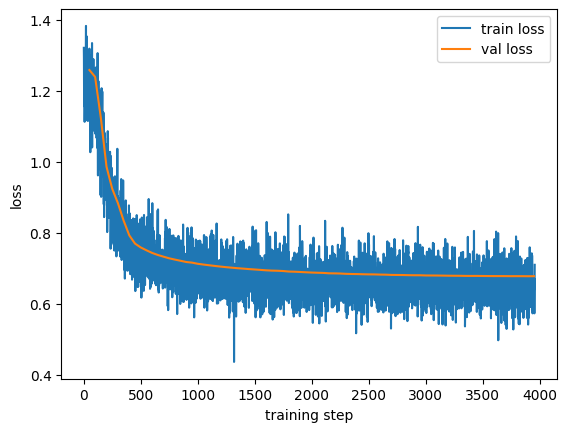

In [19]:
import matplotlib.pyplot as plt

history = trainer.state.log_history

# train entries only
train_entries = [
    x for x in history
    if "loss" in x and "eval_loss" not in x
]
train_steps  = [e["step"] for e in train_entries]
train_losses = [e["loss"] for e in train_entries]

# eval entries only
eval_entries = [
    x for x in history
    if "eval_loss" in x
]
eval_steps  = [e["step"] for e in eval_entries]
eval_losses = [e["eval_loss"] for e in eval_entries]

plt.plot(train_steps, train_losses, label="train loss")
plt.plot(eval_steps,  eval_losses,  label="val loss")
plt.xlabel("training step")
plt.ylabel("loss")
plt.legend()
plt.show()



In [106]:
base_model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/DeepSeek-R1-Distill-Qwen-7B",
    load_in_4bit=False,
    dtype="bfloat16",
    max_seq_length=2048,  
    token=os.getenv("HF_TOKEN"),
)

==((====))==  Unsloth 2025.6.12: Fast Qwen2 patching. Transformers: 4.53.1.
   \\   /|    NVIDIA H100 80GB HBM3. Num GPUs = 1. Max memory: 79.096 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 9.0. CUDA Toolkit: 12.6. Triton: 3.3.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [115]:
from transformers import AutoModelForCausalLM

am_model = AutoModelForCausalLM.from_pretrained(
    "a-m-team/AM-Thinking-v1",  
    torch_dtype="auto",
    device_map="auto"
)

Loading checkpoint shards:   0%|          | 0/14 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [114]:
# Instead of a list of dicts, just pass the text directly:
messages = [
    {"role": "user", "content": """Eight circles of radius $34$ are sequentially tangent, and two of the circles are tangent to $AB$ and $BC$ of triangle $ABC$, respectively. $2024$ circles of radius $1$ can be arranged in the same manner. The inradius of triangle $ABC$ can be expressed as $\frac{m}{n}$, where $m$ and $n$ are relatively prime positive integers. Find $m+n$."""}
]

# Now this will work:
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt",
    tokenize=True,
    return_dict=True,
).to("cuda")

from transformers import TextStreamer

total_window = model.config.max_position_embeddings
prompt_len = inputs.input_ids.shape[-1]
max_gen = total_window - prompt_len


_ = model.generate(
    **inputs,
    max_new_tokens=max_gen,              # give the model more room
    temperature=1.0,
    top_p=0.95,
    top_k=64,
    streamer=TextStreamer(tokenizer, skip_prompt=True),
)



The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


AttributeError: 'Qwen2Attention' object has no attribute 'apply_qkv'

In [20]:
# import torch
# import os
# from vllm import LLM, SamplingParams

# llm = LLM(
#     model="theamrelhady/finetuned-math-deepseek-r1-distill-qwen-7b",
#     tensor_parallel_size=1,
#     dtype=torch.float16,
#     trust_remote_code=True,
#     hf_token=os.getenv("HF_TOKEN"),
#     gpu_memory_utilization=0.7,
# )

# sampling_params = SamplingParams(
#     max_tokens=1024,
#     stop_token_ids=[tokenizer.eos_token_id],
#     ignore_eos=False
# )

# prompt = (
#   "### Question:\n"
#   "Find the sum of the roots of x^2 − 5x + 6 = 0.\n"
#   "### Answer (just the number):"
# )

# outputs = llm.generate([prompt], sampling_params=SamplingParams())


In [21]:
# print(outputs[0].outputs[0].text)

In [ ]:
from datasets import load_dataset
import pandas as pd

sat = load_dataset("dmayhem93/agieval-sat-math", split="test")
results = []

for i in range(1):
    messages = [
        {"role": "user", "content": sat["query"][i] + "\n Be concise in your solution and return the final letter and answer."}
    ]

    solution_index = sat["gold"][i][0]
    solution = sat["choices"][i][solution_index]
    print(solution)

    # Prepare inputs for model
    inputs = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=True,
        return_tensors="pt",
        tokenize=True,
        return_dict=True,
    ).to("cuda")

    from transformers import TextStreamer

    total_window = model.config.max_position_embeddings
    prompt_len = inputs.input_ids.shape[-1]
    max_gen = total_window - prompt_len
    
    output = model.generate(
        **inputs,
        max_new_tokens=1024,              
        temperature=1.0,
        top_p=0.95,
        top_k=64,
        streamer=TextStreamer(tokenizer, skip_prompt=True),
        return_dict_in_generate=True,
        output_scores=True
    )

    # Get model's response as text
    response = tokenizer.decode(output.sequences[0], skip_special_tokens=True)

    # Prepare verification prompt
    verification_messages = [
        {"role": "user", "content": f"Here is a model's solution to a math problem:\n{response}\n\nThe correct solution is: {solution}\n\nBased on comparing these, respond with exactly one word - either 'Correct' or 'Incorrect'."}
    ]

    verification_inputs = tokenizer.apply_chat_template(
        verification_messages,
        add_generation_prompt=True,
        return_tensors="pt",
        tokenize=True,
        return_dict=True,
    ).to("cuda")

    verification = model.generate(
        **verification_inputs,
        max_new_tokens=10,
        temperature=0.1,
        top_p=0.95,
        top_k=64,
        streamer=TextStreamer(tokenizer, skip_prompt=True)
    )
    
    verification_result = tokenizer.decode(verification[0], skip_special_tokens=True)

    # Store results
    results.append({
        'Question': sat["query"][i],
        'Correct Solution': solution,
        'Model Solution': response,
        'Verification': verification_result
    })


(D)10
To find the value of \( x \) given the equations \(\frac{x-1}{3} = k\) and \( k = 3 \):

1. Substitute \( k = 3 \) into the first equation:
   \[
   \frac{x - 1}{3} = 3
   \]

2. Multiply both sides of the equation by 3 to clear the fraction:
   \[
   x - 1 = 3 \times 3
   \]
   \[
   x - 1 = 9
   \]

3. Add 1 to both sides to solve for \( x \):
   \[
   x = 9 + 1
   \]
   \[
   x = 10
   \]

Therefore, the value of \( x \) is \(\boxed{10}\). The correct answer is \(\boxed{D}\).
The answer is: 1. \( x = 10 \)
2. \(\boxed{D}\) is the correct answer. Answer: \( x = 10 \) and \(\boxed{D}\)
The answer is: 1. \( x = 10 \)
2. \(\boxed{D}\) is the correct answer. Answer: \( x = 10 \) and \(\boxed{D}\)
The answer is: 1. \( x = 10 \) and \(\boxed{D}\) is the correct answer. Answer: \( x = 10 \) and \(\boxed{D}\)
The answer is: 1. \( x = 10 \) and \(\boxed{D}\) is the correct answer. Answer: \( x = 10 \) and \(\boxed{D}\) is the correct answer. Answer: \( x = 10 \) and \(\boxed{D}\) is the

KeyboardInterrupt: 

In [76]:
results_df = pd.DataFrame(results)
print("\nResults Table:")
print(results_df)  # Print full results table

# Count number of "Correct" verifications
correct_count = len(results_df[results_df['Verification'] == 'Correct'])
print(f"\nNumber of correct solutions: {correct_count}")


Results Table:
                                            Question Correct Solution  \
0  Q: If $\frac{x-1}{3}=k$ and $k=3$, what is the...            (D)10   

                                      Model Solution  \
0  <|im_start|>system\nYou are Qwen, created by A...   

                                        Verification  
0  <|im_start|>system\nYou are Qwen, created by A...  

Number of correct solutions: 0


In [78]:
from datasets import load_dataset

# Replace with the actual AIME dataset path or your local file
aime = load_dataset("opencompass/AIME2025", 'AIME2025-I', split="test")

def format_aime(example):
    prompt = (
        f"### Question:\n"
        f"{example['question']}\n"
        f"### Answer (just the number):"
    )
    return {"text": prompt, "gold": str(example["answer"])}

aime = aime.map(format_aime)


==((====))==  Unsloth 2025.6.12: Fast Qwen2 patching. Transformers: 4.53.1.
   \\   /|    NVIDIA H100 80GB HBM3. Num GPUs = 1. Max memory: 79.096 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 9.0. CUDA Toolkit: 12.6. Triton: 3.3.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)

In [86]:
import re
from tqdm import tqdm
import torch

# 1. Move only the model to device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# 2. Generate predictions
preds = []
for ex in tqdm(aime, desc="Generating AIME answers"):
    # Tokenize on CPU and then move inputs to device
    inputs = tokenizer(
        ex["text"],
        return_tensors="pt",
        truncation=True,
        padding="longest",
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Generate up to 16 tokens, stop on newline or EOS
    out_ids = model.generate(
        **inputs,
        max_new_tokens=100000,
        do_sample=False,
        early_stopping=True,
        pad_token_id=tokenizer.eos_token_id,
        eos_token_id=tokenizer.eos_token_id,
    )
    # print(out_ids)

    # Decode only the newly generated tokens
    gen = tokenizer.decode(
        out_ids[0, inputs["input_ids"].shape[-1]:],
        skip_special_tokens=True
    )
    print(f"Generated response: {gen}")
    preds.append(gen.strip())

# 3. Extract the first integer from each prediction
def extract_number(s):
    m = re.search(r"\b(\d+)\b", s)
    return m.group(1) if m else ""

pred_numbers = [extract_number(p) for p in preds]
print("\nExtracted numbers:")
for i, num in enumerate(pred_numbers):
    print(f"Problem {i+1}: {num}")

# 4. Read gold answers
gold_numbers = [ex["gold"] for ex in aime]
print("\nGold answers:")
for i, num in enumerate(gold_numbers):
    print(f"Problem {i+1}: {num}")

# 5. Compute exact-match accuracy
correct = sum(p == g for p, g in zip(pred_numbers, gold_numbers))
total   = len(gold_numbers)
accuracy = correct / total

print(f"\nAIME2025 exact-match accuracy: {accuracy:.2%} ({correct}/{total})")


Generating AIME answers:   0%|          | 0/15 [00:06<?, ?it/s]


KeyboardInterrupt: 